##  _*SVM with a classical RBF kernel: multiclass classifier extension*_

A multiclass extension works in conjunction with an underlying binary (two class) classifier to provide multiclass classification.

Currently three different multiclass extensions are supported:

* OneAgainstRest
* AllPairs
* ErrorCorrectingCode

These use different techniques to group the data with binary classification to achieve the final multiclass classification.

In [1]:
import numpy as np
from qiskit.ml.datasets import wine
from qiskit.aqua.utils import split_dataset_to_data_and_labels
from qiskit.aqua.algorithms import SklearnSVM
from qiskit.aqua.components.multiclass_extensions import (OneAgainstRest,
                                                          AllPairs,
                                                          ErrorCorrectingCode)

Here we choose the `Wine` dataset which has 3 classes.

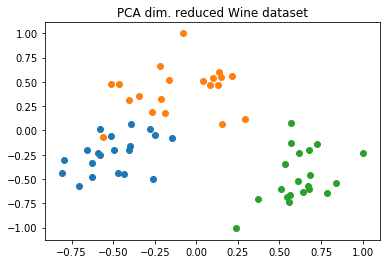

In [2]:
feature_dim = 2  # dimension of each data point
sample_Total, training_input, test_input, class_labels = wine(training_size=20,
                                                              test_size=10, n=feature_dim, plot_data=True)

temp = [test_input[k] for k in test_input]
total_array = np.concatenate(temp)

Now we setup the classical `SVM` algorithm and add a multiclass extension to classify the Wine data set, since it has 3 classes. We loop over the three extensions to show the result with each.

In [3]:
extensions = [ OneAgainstRest(),
               AllPairs(),
               ErrorCorrectingCode(code_size=5) ]

for extension in extensions:
    result = SklearnSVM(training_input, test_input, total_array, multiclass_extension=extension).run()
    print("\n----- Using multiclass extension: '{}' -----\n".format(extension.__class__.__name__))
    for k,v in result.items():
        print("'{}' : {}".format(k, v))



----- Using multiclass extension: 'OneAgainstRest' -----

'testing_accuracy' : 1.0
'test_success_ratio' : 1.0
'predicted_labels' : [0 0 1 1 1 2 2 2 2 2]
'predicted_classes' : ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']

----- Using multiclass extension: 'AllPairs' -----

'testing_accuracy' : 1.0
'test_success_ratio' : 1.0
'predicted_labels' : [0 0 1 1 1 2 2 2 2 2]
'predicted_classes' : ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']

----- Using multiclass extension: 'ErrorCorrectingCode' -----

'testing_accuracy' : 1.0
'test_success_ratio' : 1.0
'predicted_labels' : [0 0 1 1 1 2 2 2 2 2]
'predicted_classes' : ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']
